## Example with Custom Data

In [1]:
import numpy as np 
import pandas as pd
import networkx as nx 
from model.diffusion import create_model_from_graph
import dowhy.gcm as cy
from dowhy.gcm  import draw_samples, interventional_samples, counterfactual_samples

n = 1000
x1 = np.random.normal(size=(n))
x2 = x1 + np.random.normal(size=(n)) 
x3 = x1 + x2 + np.random.normal(size=(n)) 
graph = nx.DiGraph([('x1', 'x2'), ('x1', 'x3'), ('x2','x3')])
factual = pd.DataFrame({"x1" : x1, "x2" : x2, "x3" : x3})
factual.head()


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,x1,x2,x3
0,1.080419,0.209818,1.714534
1,-2.072334,-1.348848,-3.314112
2,1.301027,1.155196,1.714924
3,1.802104,0.857641,2.054792
4,0.408486,0.814797,2.950110


In [2]:
params = {'num_epochs' : 200,
          'lr' : 1e-4,
          'batch_size': 64,
          'hidden_dim' : 64}

diff_model = create_model_from_graph(graph, params)

cy.fit(diff_model, factual)

Fitting causal mechanism of node x3: 100%|██████████| 3/3 [00:05<00:00,  1.96s/it]


In [3]:
# Observational Samples
obs_samples = draw_samples(diff_model, num_samples = 20)
obs_samples.head()

,x1,x2,x3
0,0.242151,0.602441,0.697818
1,1.147019,-0.573428,-0.589873
2,0.560376,0.019936,-0.248564
3,1.036918,0.492662,0.826894
4,0.173450,-0.547257,-0.620032


In [4]:
intervention = {"x1": lambda x: 2}
int_samples = interventional_samples(diff_model, intervention, num_samples_to_draw=20)
int_samples.head()

,x1,x2,x3
0,2,1.211636,3.109947
1,2,2.056405,5.458492
2,2,2.074754,5.663898
3,2,1.536017,2.445876
4,2,3.226298,6.365125


In [5]:
cf_estimates = counterfactual_samples(diff_model, intervention, observed_data = factual)
cf_estimates.head()

,x1,x2,x3
0,2,1.041874,3.504380
1,2,2.426617,4.643862
2,2,1.795991,3.238968
3,2,1.050746,2.487216
4,2,2.297843,6.336059


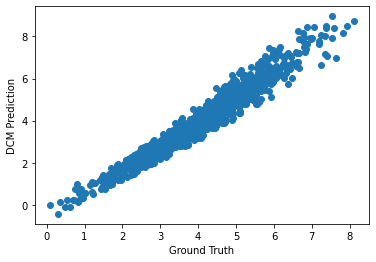

In [6]:
import matplotlib.pyplot as plt 
ground_truth_x2 = (2 - factual["x1"]) + factual["x2"]
ground_truth_x3 = 2 * (2 - factual["x1"]) + factual["x3"]
fig, ax = plt.subplots()
plt.scatter(ground_truth_x3,cf_estimates["x3"])

plt.xlabel("Ground Truth")
plt.ylabel("DCM Prediction");

## Example with Prespecified Graph

In [7]:
from experiments.structural_equations import *
from experiments.data_generation import ExperimentationModel
n = 500
scm_type = "diamond"
equations_type = "nonadditive"
g = get_graph(scm_type)
structural_equations, noise_distributions = select_struct_and_noise(equations_type, scm_type)
exper_model = ExperimentationModel(g, scm_type, structural_equations, noise_distributions)
factual, noise = exper_model.sample(n)



diff_model = create_diff_model(scm_type, params)

cy.fit(diff_model, factual)

Fitting causal mechanism of node x4: 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


In [8]:
factual.head()

,x1,x2,x3,x4
0,-0.087256,0.056533,3.155144,-0.764645
1,1.174429,2.519266,5.068688,-2.671952
2,0.538098,0.839421,4.260010,-2.360014
3,1.633835,2.057782,4.502608,-2.698460
4,-0.688768,1.502286,5.121723,-2.739814


In [9]:
from dowhy.gcm  import interventional_samples
intervention = {"x1": lambda x: 2}
int_samples = interventional_samples(diff_model, intervention, num_samples_to_draw=20)
int_samples.head()

,x1,x2,x3,x4
0,2,3.670004,4.108356,-2.690757
1,2,2.987519,5.194756,-2.401216
2,2,2.985081,3.569173,-2.583557
3,2,2.511662,4.272810,-2.771418
4,2,2.811127,4.155429,-2.899285


In [10]:
from dowhy.gcm  import counterfactual_samples
cf_estimates = counterfactual_samples(diff_model, intervention, observed_data = factual)
cf_estimates.head()

,x1,x2,x3,x4
0,2,2.279446,3.728182,-2.605973
1,2,4.364803,5.626756,-1.729665
2,2,3.285627,5.249624,-2.450392
3,2,2.914311,4.972789,-2.597203
4,2,4.018981,4.904093,-2.349076
